In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DataScience_salaries_2024.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [5]:
# Check for null values in each column
null_values = df.isnull().sum()

# Display the null values
print("Null values in each column:")
print(null_values)

# show columns with missing values only
missing_columns = null_values[null_values > 0]
print("\nColumns with missing values:")
print(missing_columns)

Null values in each column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Columns with missing values:
Series([], dtype: int64)


In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


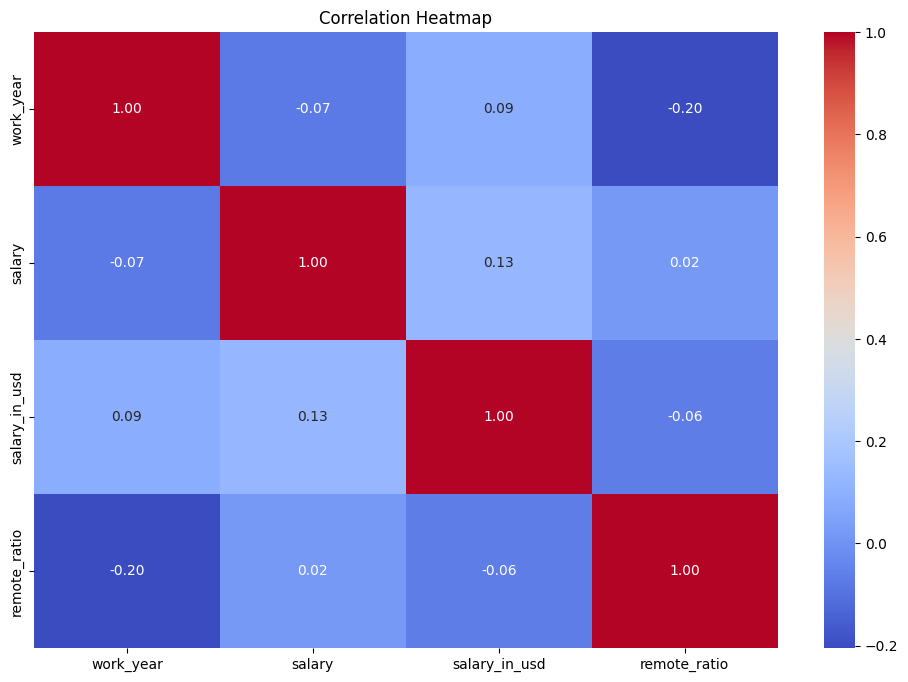

In [8]:
# Select only numeric columns for the correlation matrix
numeric_data = df.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

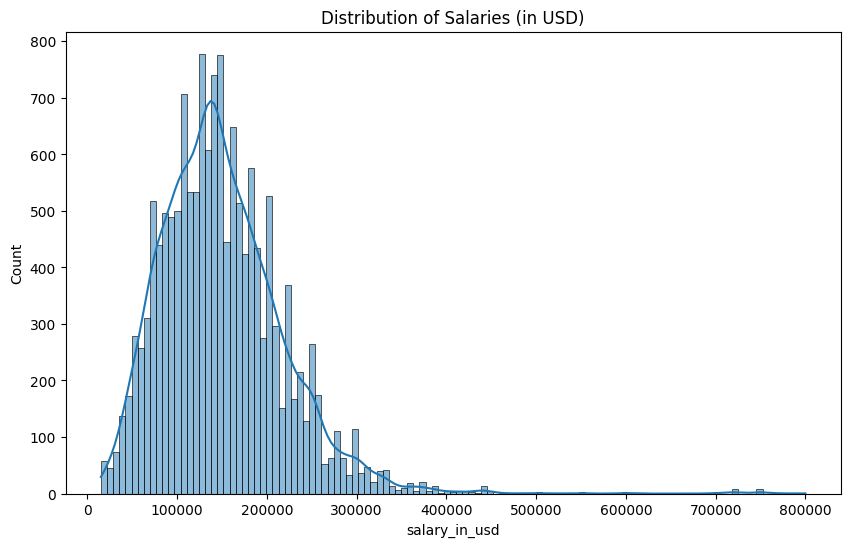

In [10]:
# Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title("Distribution of Salaries (in USD)")
plt.show()

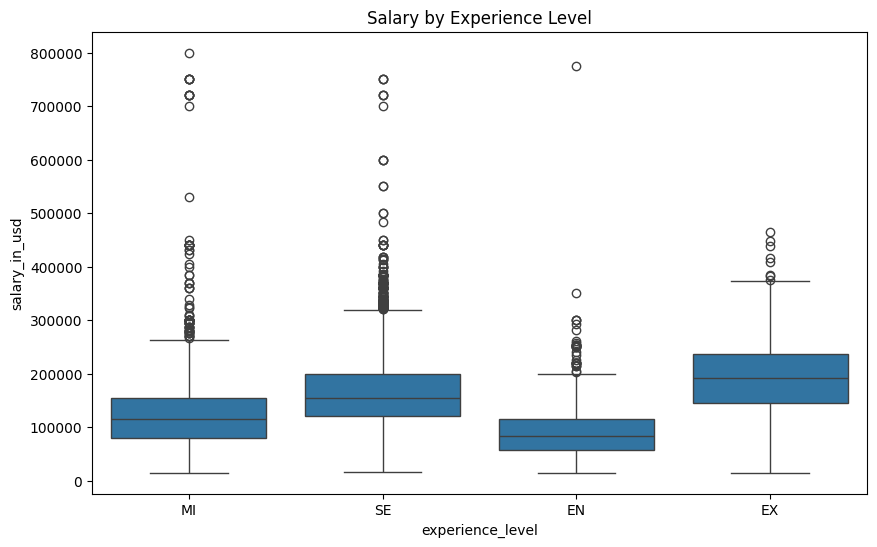

In [13]:
# Salary by Experience Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title("Salary by Experience Level")
plt.show()

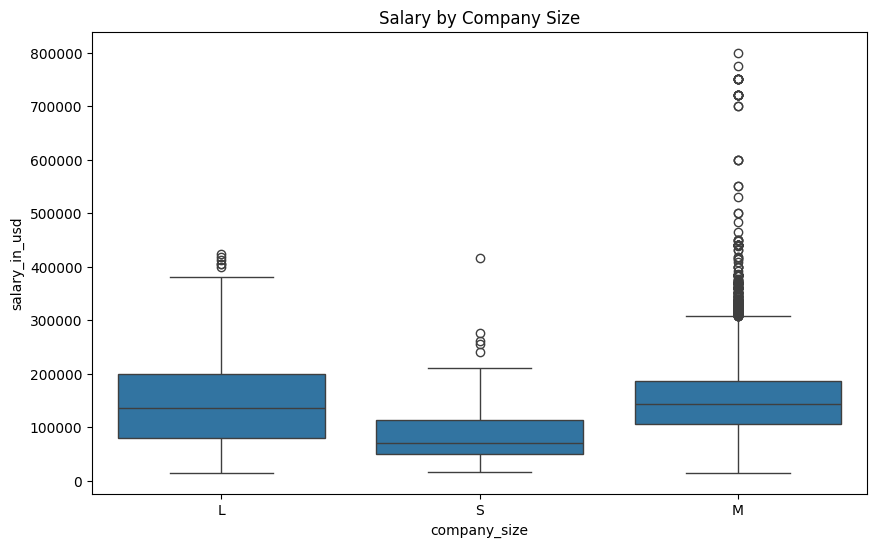

In [15]:
# Salary by Company Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title("Salary by Company Size")
plt.show()

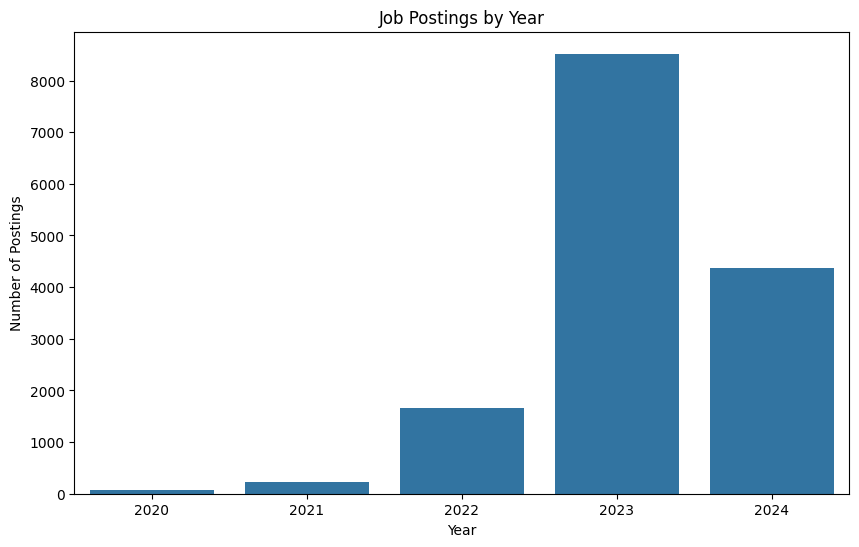

In [16]:
# Count plot of job postings by year
plt.figure(figsize=(10, 6))
sns.countplot(x='work_year', data=df)
plt.title('Job Postings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Postings')
plt.show()

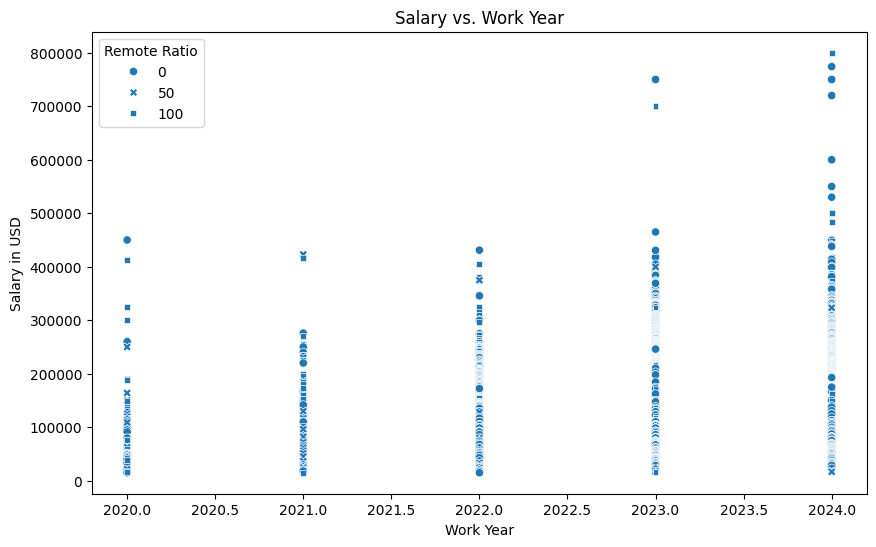

In [19]:
# Salary vs. Work Year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='work_year', y='salary_in_usd', style='remote_ratio', palette='viridis')
plt.title('Salary vs. Work Year')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.legend(title='Remote Ratio')
plt.show()

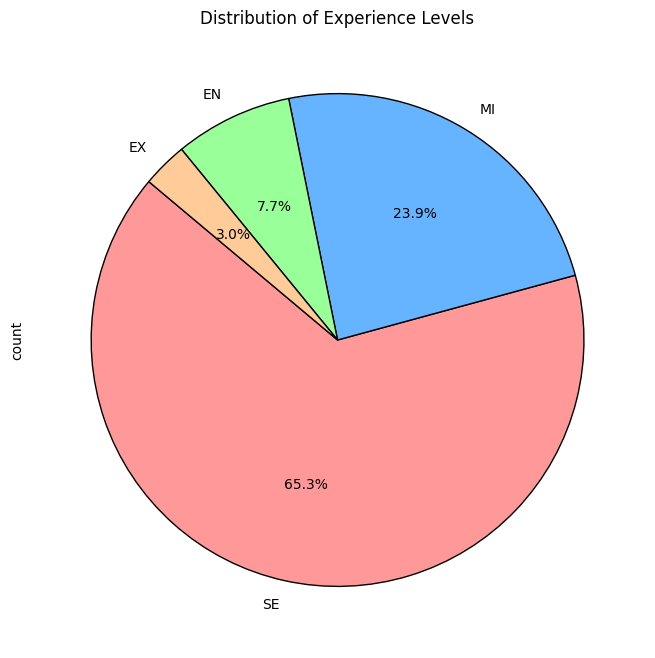

In [22]:
# Pie Chart: Experience Level Distribution
experience_level_counts = df['experience_level'].value_counts()

plt.figure(figsize=(8, 8))
experience_level_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=140, colors= ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], wedgeprops={'edgecolor': 'black'}  )

plt.title('Distribution of Experience Levels')  # Title of the chart

plt.show()

In [24]:
# Save the DataFrame to a CSV file
df.to_csv('ds_salaries_cleaned.csv', index=False)